In [75]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [76]:
df_train_x = pd.read_csv("data/splitted/Fraud_Detection_train_features.csv")
df_train_y = pd.read_csv("data/splitted/Fraud_Detection_train_target.csv")
df_val_x = pd.read_csv("data/splitted/Fraud_Detection_validation_features.csv")
df_val_y = pd.read_csv("data/splitted/Fraud_Detection_validation_target.csv")
df_test_x = pd.read_csv("data/splitted/Fraud_Detection_test_features.csv")
df_test_y = pd.read_csv("data/splitted/Fraud_Detection_test_target.csv")

#shape가 일치하는지 확인
print(df_train_x.shape)
print(df_train_y.shape)
print(df_val_x.shape)
print(df_val_y.shape)
print(df_test_x.shape)
print(df_test_y.shape)

(28014, 16)
(28014, 1)
(9338, 16)
(9338, 1)
(9339, 16)
(9339, 1)


In [77]:
df_train_x.head(8)

,TRANS_YEAR,IS_COVID_YEAR,TRANS_MONTH,TRANS_DAY,TRANS_DAY_SIMPLIFIED,TRANS_HOUR,TRANS_HOUR_SIMPLIFIED,CATEGORY,AMT,GENDER,CITY,CITY_POP,STATE,JOB,AGE,CC_NUM
0,2019,False,1,10,0,23,3,1,344.01,0,Fulton,355,45,Financial adviser,68,3513618443244549
1,2019,False,12,22,2,17,2,13,39.79,0,Hinckley,7646,37,Medical sales representative,35,6011367958204270
2,2019,False,3,23,2,14,2,9,117.32,0,Tyler,144160,17,Sports development officer,39,6506116513503136
3,2019,False,9,1,0,23,3,6,1002.17,1,Sacramento,757530,11,Magazine features editor,44,4890424426862856940
4,2019,False,6,5,0,22,3,8,107.33,0,Lawn,213,5,Special educational needs teacher,51,4169759661243568
5,2020,True,9,12,1,13,2,12,24.36,1,Keller,95035,17,Probation officer,36,4102003771126577611
6,2020,True,12,26,2,19,3,12,54.93,1,High Rolls Mountain Park,899,12,Naval architect,56,3514865930894695
7,2019,False,6,9,0,16,2,6,17.91,0,Burbank,3684,1,Musician,41,6011724471098086


In [78]:
df_train_y.head(8)

,IS_FRAUD
0,True
1,False
2,False
3,True
4,True
5,False
6,False
7,False


train 데이터셋을 이리저리 뜯어보고 만져보고 시각화하며 train 데이터셋의 인사이트, 패턴을 발견한다.

-> 모든 2개의 feature의 조합으로 Fraud데이터와 not fraud데이터의 분포상태를 파악하고, 패턴이 있는 조합을 추려낸다.

-> 그리고 패턴 중에서 더 선명한 패턴을 보이는 조합을 더 비중있게 다룬다.

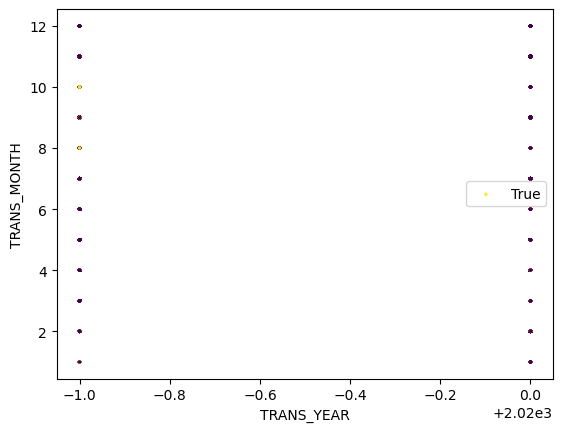

In [79]:
x_feature = "TRANS_YEAR"
y_feature = "TRANS_MONTH"

plt.scatter(x = df_train_x[x_feature], y = df_train_x[y_feature], c = df_train_y["IS_FRAUD"], s = 2)
plt.xlabel(x_feature)
plt.ylabel(y_feature)
plt.legend(df_train_y["IS_FRAUD"])
plt.show()

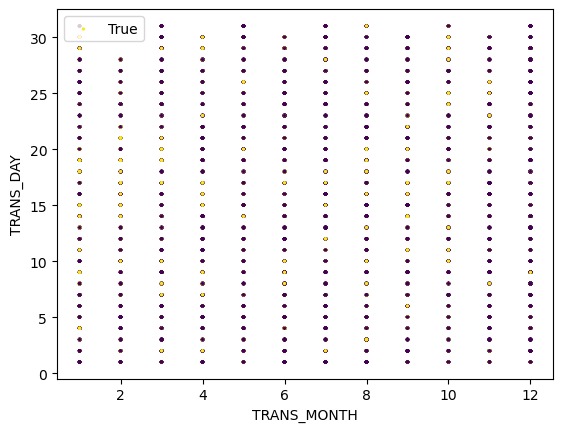

In [80]:
x_feature = "TRANS_MONTH"
y_feature = "TRANS_DAY"

plt.scatter(x = df_train_x[x_feature], y = df_train_x[y_feature], c = df_train_y["IS_FRAUD"], s = 2)
plt.xlabel(x_feature)
plt.ylabel(y_feature)
plt.legend(df_train_y["IS_FRAUD"])
plt.show()

변수의 갯수가 적은 경우에는 시각화보다 표 또는 PLOT그래프로 정리하는게 더 좋음.

독립변수가 AMT, CITY_POP조합을 제외하면 전부 표나 PLOT그래프로 정리해 놓는게 유리하다

## 시각화 먼저 진행

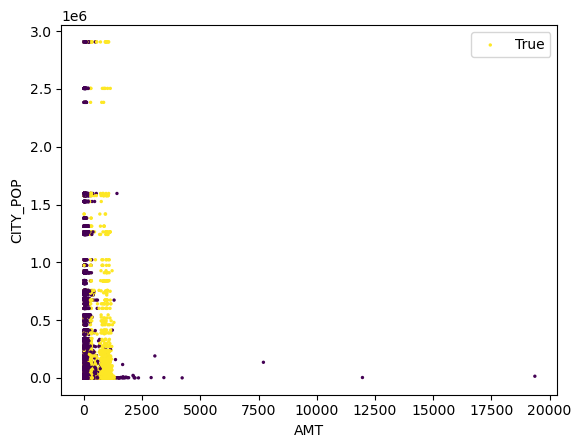

In [81]:
x_feature = "AMT"
y_feature = "CITY_POP"

plt.scatter(x = df_train_x[x_feature], y = df_train_x[y_feature], c = df_train_y["IS_FRAUD"], s = 2)
plt.xlabel(x_feature)
plt.ylabel(y_feature)
plt.legend(df_train_y["IS_FRAUD"])
plt.show()

변수의 갯수가 많아서 시각화 하기에 적절하지만 이상치 제거가 필요함

## 여기서 train feature테이블과 target테이블을 concat함

In [82]:
df_train = pd.concat([df_train_x, df_train_y],axis = 1)

TRANS_YEAR               0
IS_COVID_YEAR            0
TRANS_MONTH              0
TRANS_DAY                0
TRANS_DAY_SIMPLIFIED     0
TRANS_HOUR               0
TRANS_HOUR_SIMPLIFIED    0
CATEGORY                 0
AMT                      0
GENDER                   0
CITY                     0
CITY_POP                 0
STATE                    0
JOB                      0
AGE                      0
CC_NUM                   0
IS_FRAUD                 0
dtype: int64
(27301, 17)


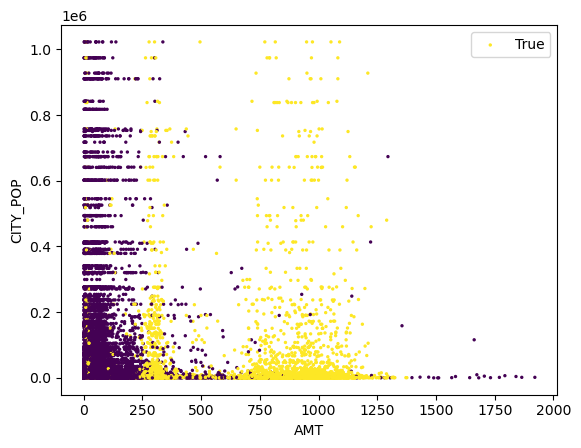

In [83]:
df_train = df_train[(df_train["CITY_POP"] < 1200000) & (df_train["AMT"] < 2000)]

print(df_train.isnull().sum())

print(df_train.shape)

x_feature = "AMT"
y_feature = "CITY_POP"

plt.scatter(x = df_train[x_feature], y = df_train[y_feature], c = df_train["IS_FRAUD"], s = 2)
plt.xlabel(x_feature)
plt.ylabel(y_feature)
plt.legend(df_train_y["IS_FRAUD"])
plt.show()

In [84]:
df_train.head(88)

,TRANS_YEAR,IS_COVID_YEAR,TRANS_MONTH,TRANS_DAY,TRANS_DAY_SIMPLIFIED,TRANS_HOUR,TRANS_HOUR_SIMPLIFIED,CATEGORY,AMT,GENDER,CITY,CITY_POP,STATE,JOB,AGE,CC_NUM,IS_FRAUD
0,2019,False,1,10,0,23,3,1,344.01,0,Fulton,355,45,Financial adviser,68,3513618443244549,True
1,2019,False,12,22,2,17,2,13,39.79,0,Hinckley,7646,37,Medical sales representative,35,6011367958204270,False
2,2019,False,3,23,2,14,2,9,117.32,0,Tyler,144160,17,Sports development officer,39,6506116513503136,False
3,2019,False,9,1,0,23,3,6,1002.17,1,Sacramento,757530,11,Magazine features editor,44,4890424426862856940,True
4,2019,False,6,5,0,22,3,8,107.33,0,Lawn,213,5,Special educational needs teacher,51,4169759661243568,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
89,2019,False,10,9,0,13,2,13,110.04,0,Paradise Valley,17047,35,Building surveyor,88,378858024506425,False
90,2020,True,8,16,1,16,2,9,5.49,1,Mooresville,69793,0,Control and instrumentation engineer,69,180072527505094,False
91,2019,False,9,20,1,0,0,6,592.19,1,Springfield,9034,33,"Therapist, occupational",54,4410582919485061752,False
92,2019,False,6,9,0,20,3,8,83.14,1,Portland,841711,23,"Engineer, building services",60,4195740185974,False


## 인덱스 87번이 빠져 있음을 기억해 두자

FRAUD가 CITY_POP과는 전혀 연관이 없어 보인다. (CITY_POP이 무엇이든 간에 AMT에 대한 FRAUD의 분포는 거의 동일함)
# 결론1: CITY_POP은 모델에서 빼자

##### 이제 PLOT그래프를 그려볼 차례이다.
##### AMT는 값의 종류가 매우 많기 때문에 일정한 범위로 묶어서 PLOT그래프를 그려야 한다

# 주의!
## 한 column에서 가질 수 있는 각각의 값의 갯수가 서로 다르기 때문에, FRAUD가 아니라 FRAUD_RATIO를 사용해야 한다.

In [85]:
#The ratio of FRAUD about AMT

amt_group = pd.DataFrame(columns = ["FRAUD", "NOT_FRAUD", "FRAUD_RATIO"], index = ["0~250", "251~500", "501~750", "751~1000", "1001~1250", "1251~"])

amt_group = amt_group.fillna(0)

amt_group

,FRAUD,NOT_FRAUD,FRAUD_RATIO
0~250,0,0,0
251~500,0,0,0
501~750,0,0,0
751~1000,0,0,0
1001~1250,0,0,0
1251~,0,0,0


In [86]:
for i in range(df_train.shape[0]):
    try:
        if((df_train.loc[i, "AMT"] >= 0) and (df_train.loc[i, "AMT"] <= 250)):
            if(df_train.loc[i,"IS_FRAUD"] == True):
                amt_group.loc["0~250", "FRAUD"] = amt_group.loc["0~250", "FRAUD"] + 1
            else:
                amt_group.loc["0~250", "NOT_FRAUD"] = amt_group.loc["0~250", "NOT_FRAUD"] + 1
        if((df_train.loc[i, "AMT"] >= 251) and (df_train.loc[i, "AMT"] <= 500)):
            if(df_train.loc[i,"IS_FRAUD"] == True):
                amt_group.loc["251~500", "FRAUD"] = amt_group.loc["251~500", "FRAUD"] + 1
            else:
                amt_group.loc["251~500", "NOT_FRAUD"] = amt_group.loc["251~500", "NOT_FRAUD"] + 1
        if((df_train.loc[i, "AMT"] >= 501) and (df_train.loc[i, "AMT"] <= 750)):
            if(df_train.loc[i,"IS_FRAUD"] == True):
                amt_group.loc["501~750", "FRAUD"] = amt_group.loc["501~750", "FRAUD"] + 1
            else:
                amt_group.loc["501~750", "NOT_FRAUD"] = amt_group.loc["501~750", "NOT_FRAUD"] + 1
        if((df_train.loc[i, "AMT"] >= 751) and (df_train.loc[i, "AMT"] <= 1000)):
            if(df_train.loc[i,"IS_FRAUD"] == True):
                amt_group.loc["751~1000", "FRAUD"] = amt_group.loc["751~1000", "FRAUD"] + 1
            else:
                amt_group.loc["751~1000", "NOT_FRAUD"] = amt_group.loc["751~1000", "NOT_FRAUD"] + 1
        if((df_train.loc[i, "AMT"] >= 1001) and (df_train.loc[i, "AMT"] <= 1250)):
            if(df_train.loc[i,"IS_FRAUD"] == True):
                amt_group.loc["1001~1250", "FRAUD"] = amt_group.loc["1001~1250", "FRAUD"] + 1
            else:
                amt_group.loc["1001~1250", "NOT_FRAUD"] = amt_group.loc["1001~1250", "NOT_FRAUD"] + 1
        else:
            if(df_train.loc[i,"IS_FRAUD"] == True):
                amt_group.loc["1251~", "FRAUD"] = amt_group.loc["1251~", "FRAUD"] + 1
            else:
                amt_group.loc["1251~", "NOT_FRAUD"] = amt_group.loc["1251~", "NOT_FRAUD"] + 1
    except:
        pass
            
print(amt_group)

           FRAUD  NOT_FRAUD  FRAUD_RATIO
0~250       1400      20579            0
251~500     1423        327            0
501~750      386        124            0
751~1000    1589         27            0
1001~1250    680         10            0
1251~       4837      21083            0


### 이상치를 제거했기 때문에 index가 중간중간 빠져있다. 따라서 try-except문을 추가해서 pass하도록 함

In [87]:
amt_group["FRAUD_RATIO"] = amt_group["FRAUD"]/(amt_group["NOT_FRAUD"] + amt_group["FRAUD"])

amt_group

,FRAUD,NOT_FRAUD,FRAUD_RATIO
0~250,1400,20579,0.063697
251~500,1423,327,0.813143
501~750,386,124,0.756863
751~1000,1589,27,0.983292
1001~1250,680,10,0.985507
1251~,4837,21083,0.186613


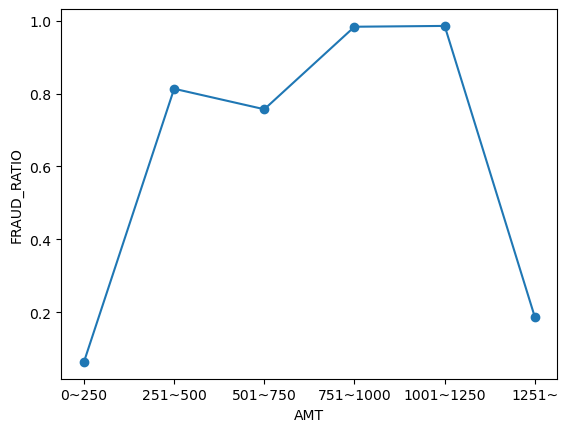

In [88]:
plt.plot(["0~250", "251~500", "501~750", "751~1000", "1001~1250", "1251~"], amt_group["FRAUD_RATIO"])
plt.scatter(["0~250", "251~500", "501~750", "751~1000", "1001~1250", "1251~"], amt_group["FRAUD_RATIO"])
plt.xlabel("AMT")
plt.ylabel("FRAUD_RATIO")
plt.show()

# 결론2: AMT는 M자 모양의 모델을 선정한다.

In [89]:
type(df_train["CITY_POP"].unique())

numpy.ndarray

### 나머지 features에 대하여 FRAUD_RATIO를 구하는 함수를 정의한다.
#### PARAMETER: 첫 번째 열은 FRAUD_RATIO를 구하고 싶은 feature가, 두 번재 열은 IS_FRAUD 열이다.

In [90]:
def find_fraud_ratio(df):
    obj_column_name = list(df.columns)
    obj_column_name = obj_column_name[0]
    
    print(obj_column_name)
    
    idx_list = list(df[obj_column_name].unique())
    
    df_result = pd.DataFrame(columns = ["INDEX", "FRAUD", "NOT_FRAUD", "FRAUD_RATIO"], index = idx_list)
    df_result = df_result.fillna(0)
    df_result["INDEX"] = idx_list
    

    for i in range(df.shape[0]):
        try:
            if(df.loc[i, "IS_FRAUD"] == True):
                df_result.loc[(df.loc[i, obj_column_name]), "FRAUD"] += 1
            else:
                df_result.loc[(df.loc[i, obj_column_name]), "NOT_FRAUD"] += 1
        except:
            pass
            
    df_result["FRAUD_RATIO"] = df_result["FRAUD"] / (df_result["FRAUD"] + df_result["NOT_FRAUD"])
    
    df_result = df_result[["INDEX", "FRAUD_RATIO"]]
    
    df_result = df_result.sort_values("INDEX")
    
    df_result = df_result.rename(columns={"INDEX":obj_column_name})
    
    return df_result

리턴값은 1열이 한 feature가 가지는 값의 종류이고, 2열이 FRAUD_RATIO이다.

In [91]:
print(df_train.columns)

Index(['TRANS_YEAR', 'IS_COVID_YEAR', 'TRANS_MONTH', 'TRANS_DAY',
       'TRANS_DAY_SIMPLIFIED', 'TRANS_HOUR', 'TRANS_HOUR_SIMPLIFIED',
       'CATEGORY', 'AMT', 'GENDER', 'CITY', 'CITY_POP', 'STATE', 'JOB', 'AGE',
       'CC_NUM', 'IS_FRAUD'],
      dtype='object')


TRANS_YEAR


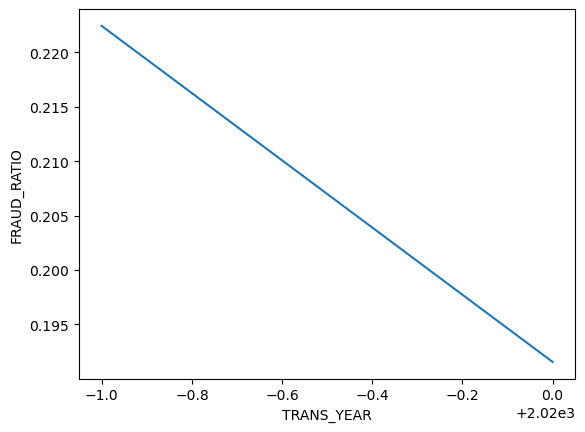

In [92]:
df_trans_year = find_fraud_ratio(df_train[["TRANS_YEAR", "IS_FRAUD"]])

plt.plot(df_trans_year["TRANS_YEAR"], df_trans_year["FRAUD_RATIO"])
plt.xlabel("TRANS_YEAR")
plt.ylabel("FRAUD_RATIO")
plt.show()

# 결론3: TRANS_YEAR은 종류가 2개 뿐이기 때문에 의미가 없다(제외!)

TRANS_MONTH
    TRANS_MONTH  FRAUD_RATIO
1             1     0.284756
2             2     0.309211
3             3     0.240129
4             4     0.200309
5             5     0.243474
6             6     0.208809
7             7     0.157064
8             8     0.189889
9             9     0.212537
10           10     0.225853
11           11     0.193120
12           12     0.129838


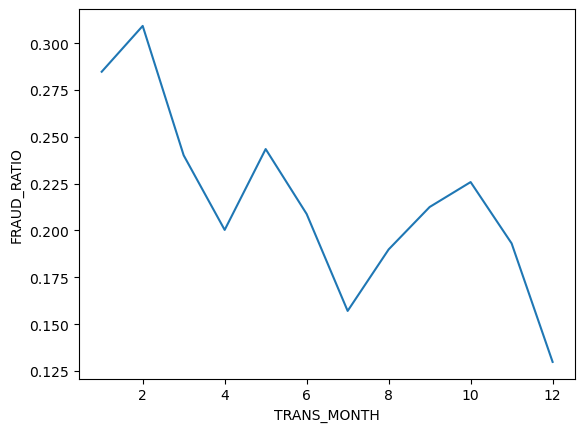

In [93]:
df_trans_month = find_fraud_ratio(df_train[["TRANS_MONTH", "IS_FRAUD"]])

print(df_trans_month)

plt.plot(df_trans_month["TRANS_MONTH"], df_trans_month["FRAUD_RATIO"])
plt.xlabel("TRANS_MONTH")
plt.ylabel("FRAUD_RATIO")
plt.show()

# 결론4: TRANS_MONTH는 4차함수 모양의 모델을 선정한다.

TRANS_DAY_SIMPLIFIED
   TRANS_DAY_SIMPLIFIED  FRAUD_RATIO
0                     0     0.198388
1                     1     0.221480
2                     2     0.202112


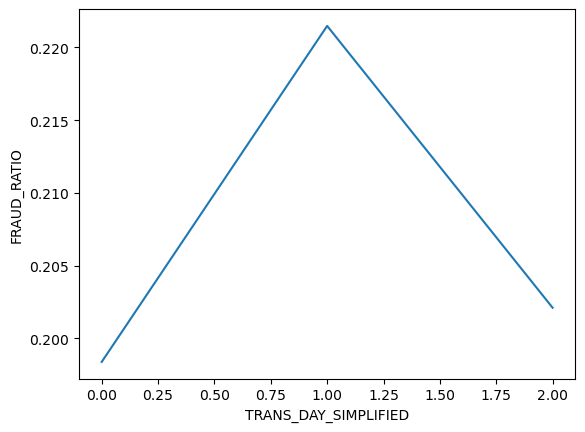

In [94]:
df_trans_day_simplified = find_fraud_ratio(df_train[["TRANS_DAY_SIMPLIFIED", "IS_FRAUD"]])

print(df_trans_day_simplified)

plt.plot(df_trans_day_simplified["TRANS_DAY_SIMPLIFIED"], df_trans_day_simplified["FRAUD_RATIO"])
plt.xlabel("TRANS_DAY_SIMPLIFIED")
plt.ylabel("FRAUD_RATIO")
plt.show()

TRANS_HOUR_SIMPLIFIED
   TRANS_HOUR_SIMPLIFIED  FRAUD_RATIO
0                      0     0.286087
1                      1     0.048208
2                      2     0.048238
3                      3     0.362732


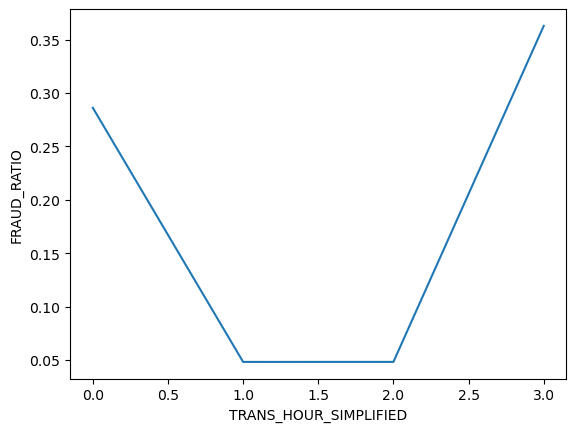

In [95]:
df_trans_hour_simplified = find_fraud_ratio(df_train[["TRANS_HOUR_SIMPLIFIED", "IS_FRAUD"]])

print(df_trans_hour_simplified)

plt.plot(df_trans_hour_simplified["TRANS_HOUR_SIMPLIFIED"], df_trans_hour_simplified["FRAUD_RATIO"])
plt.xlabel("TRANS_HOUR_SIMPLIFIED")
plt.ylabel("FRAUD_RATIO")
plt.show()

CATEGORY
    CATEGORY  FRAUD_RATIO
0          0     0.389710
1          1     0.385896
2          2     0.093642
3          3     0.162694
4          4     0.121514
5          5     0.130641
6          6     0.454804
7          7     0.250602
8          8     0.076087
9          9     0.098549
10        10     0.074126
11        11     0.113889
12        12     0.086914
13        13     0.067593


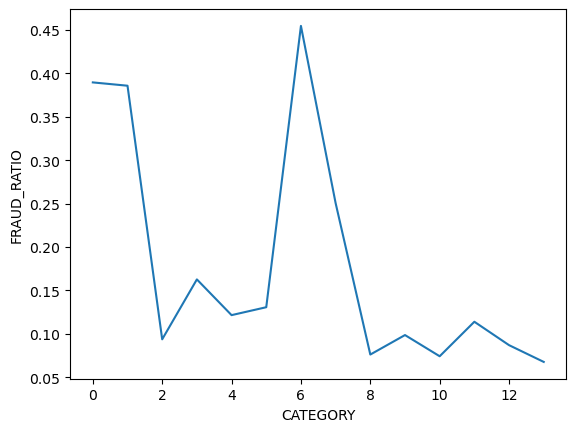

In [96]:
df_trans_category = find_fraud_ratio(df_train[["CATEGORY", "IS_FRAUD"]])

print(df_trans_category)

plt.plot(df_trans_category["CATEGORY"], df_trans_category["FRAUD_RATIO"])
plt.xlabel("CATEGORY")
plt.ylabel("FRAUD_RATIO")
plt.show()

STATE
    STATE  FRAUD_RATIO
0       0     0.193380
1       1     0.197468
2       2     0.157025
3       3     0.122951
4       4     0.253918
5       5     0.205112
6       6     0.219462
7       7     0.229551
8       8     0.226644
9       9     0.163708
10     10     0.229714
11     11     0.204732
12     12     0.207977
13     13     0.184524
14     14     0.213358
15     15     0.224109
16     16     0.204461
17     17     0.172088
18     18     0.219224
19     19     0.176166
20     20     0.174359
21     21     0.190476
22     22     0.255446
23     23     0.268734
24     24     0.125858
25     25     0.216867
26     26     0.209416
27     27     0.245395
28     28     0.213187
29     29     0.188406
30     30     0.198573
31     31     0.193443
32     32     0.198543
33     33     0.214286
34     34     0.229885
35     35     0.289720
36     36     0.209632
37     37     0.214214
38     38     0.238596
39     39     0.188755
40     40     0.186190
41     41     0.231008
42   

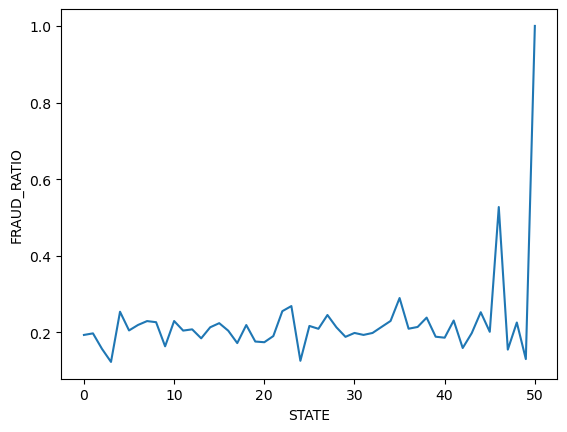

In [97]:
df_trans_state = find_fraud_ratio(df_train[["STATE", "IS_FRAUD"]])

print(df_trans_state)

plt.plot(df_trans_state["STATE"], df_trans_state["FRAUD_RATIO"])
plt.xlabel("STATE")
plt.ylabel("FRAUD_RATIO")
plt.show()

## 일단 TRANS_DAY를 넣어서 정렬테스트를 진행

In [98]:
df_train = pd.concat([df_train_x, df_train_y], axis = 1)
df_train.head()

df_train = df_train.sort_values(by=["CC_NUM", "TRANS_DAY"] ,ascending=True)

df_train.head(20)

,TRANS_YEAR,IS_COVID_YEAR,TRANS_MONTH,TRANS_DAY,TRANS_DAY_SIMPLIFIED,TRANS_HOUR,TRANS_HOUR_SIMPLIFIED,CATEGORY,AMT,GENDER,CITY,CITY_POP,STATE,JOB,AGE,CC_NUM,IS_FRAUD
8359,2019,False,3,1,0,2,0,3,11.74,0,Fort Washakie,1645,20,Information systems manager,37,60416207185,True
23590,2019,False,3,1,0,1,0,3,13.17,0,Fort Washakie,1645,20,Information systems manager,37,60416207185,True
1587,2019,False,3,2,0,23,3,8,130.08,0,Fort Washakie,1645,20,Information systems manager,37,60416207185,True
5953,2019,False,3,2,0,23,3,9,20.41,0,Fort Washakie,1645,20,Information systems manager,37,60416207185,True
11629,2019,False,3,2,0,23,3,12,19.23,0,Fort Washakie,1645,20,Information systems manager,37,60416207185,True
17863,2019,False,3,2,0,23,3,2,594.09,0,Fort Washakie,1645,20,Information systems manager,37,60416207185,True
20649,2019,False,10,2,0,4,0,1,103.84,0,Fort Washakie,1645,20,Information systems manager,37,60416207185,False
21965,2020,True,12,2,0,19,3,13,87.83,0,Fort Washakie,1645,20,Information systems manager,37,60416207185,False
9701,2019,False,10,3,0,18,2,6,7.35,0,Fort Washakie,1645,20,Information systems manager,37,60416207185,False
12148,2020,True,3,3,0,9,1,1,68.96,0,Fort Washakie,1645,20,Information systems manager,37,60416207185,False


### 날짜를 2019년 1월 1일을 0DAY라고 간주하고 며칠이 지났는지 표시하는 DAY컬럼을 추가한다.

In [99]:
list1 = []
for i in range(df_train.shape[0]):
    list1.append(0)

df_train["DAY"] = list1

df_train.head()

,TRANS_YEAR,IS_COVID_YEAR,TRANS_MONTH,TRANS_DAY,TRANS_DAY_SIMPLIFIED,TRANS_HOUR,TRANS_HOUR_SIMPLIFIED,CATEGORY,AMT,GENDER,CITY,CITY_POP,STATE,JOB,AGE,CC_NUM,IS_FRAUD,DAY
8359,2019,False,3,1,0,2,0,3,11.74,0,Fort Washakie,1645,20,Information systems manager,37,60416207185,True,0
23590,2019,False,3,1,0,1,0,3,13.17,0,Fort Washakie,1645,20,Information systems manager,37,60416207185,True,0
1587,2019,False,3,2,0,23,3,8,130.08,0,Fort Washakie,1645,20,Information systems manager,37,60416207185,True,0
5953,2019,False,3,2,0,23,3,9,20.41,0,Fort Washakie,1645,20,Information systems manager,37,60416207185,True,0
11629,2019,False,3,2,0,23,3,12,19.23,0,Fort Washakie,1645,20,Information systems manager,37,60416207185,True,0


In [100]:
df_train = df_train.reindex(list(range(df_train.shape[0])))

df_train.head()

,TRANS_YEAR,IS_COVID_YEAR,TRANS_MONTH,TRANS_DAY,TRANS_DAY_SIMPLIFIED,TRANS_HOUR,TRANS_HOUR_SIMPLIFIED,CATEGORY,AMT,GENDER,CITY,CITY_POP,STATE,JOB,AGE,CC_NUM,IS_FRAUD,DAY
0,2019,False,1,10,0,23,3,1,344.01,0,Fulton,355,45,Financial adviser,68,3513618443244549,True,0
1,2019,False,12,22,2,17,2,13,39.79,0,Hinckley,7646,37,Medical sales representative,35,6011367958204270,False,0
2,2019,False,3,23,2,14,2,9,117.32,0,Tyler,144160,17,Sports development officer,39,6506116513503136,False,0
3,2019,False,9,1,0,23,3,6,1002.17,1,Sacramento,757530,11,Magazine features editor,44,4890424426862856940,True,0
4,2019,False,6,5,0,22,3,8,107.33,0,Lawn,213,5,Special educational needs teacher,51,4169759661243568,True,0


In [129]:
import datetime as dt

for i in range(df_train.shape[0]):
    dt1 = dt.datetime(2019, 1, 1)
    dt2 = dt.datetime(df_train.loc[i, "TRANS_YEAR"], df_train.loc[i, "TRANS_MONTH"], df_train.loc[i, "TRANS_DAY"])
    if(dt1 == dt2):
        td = 0
        df_train.loc[i, "DAY"] = td
    else:
        td = dt2 - dt1
        df_train.loc[i, "DAY"] = td
        list_temp = (str(df_train.loc[i, "DAY"]).split(" day"))
#         print(list_temp)
#         print(type(list_temp[0]))
        df_train.loc[i, "DAY"] = list_temp[0]

df_train["DAY"] = df_train["DAY"].astype(int)

df_train.head()
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28014 entries, 0 to 28013
Data columns (total 18 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   TRANS_YEAR             28014 non-null  int64  
 1   IS_COVID_YEAR          28014 non-null  bool   
 2   TRANS_MONTH            28014 non-null  int64  
 3   TRANS_DAY              28014 non-null  int64  
 4   TRANS_DAY_SIMPLIFIED   28014 non-null  int64  
 5   TRANS_HOUR             28014 non-null  int64  
 6   TRANS_HOUR_SIMPLIFIED  28014 non-null  int64  
 7   CATEGORY               28014 non-null  int64  
 8   AMT                    28014 non-null  float64
 9   GENDER                 28014 non-null  int64  
 10  CITY                   28014 non-null  object 
 11  CITY_POP               28014 non-null  int64  
 12  STATE                  28014 non-null  int64  
 13  JOB                    28014 non-null  object 
 14  AGE                    28014 non-null  int64  
 15  CC

In [189]:
df_train.head()

df_train = df_train.sort_values(by=["CC_NUM", "DAY"] ,ascending=True)

df_train.head(50)

df_train.to_csv("data/ordered_by_ccnum_and_day.csv")

### CC_NUM을 기준으로 동일한 CC_NUM에 대하여 날짜가 오름차순으로 정렬되었다!